In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# # Open COVID-US
# COVID_US = np.load('/content/drive/MyDrive/Data/COVID-US-51x1-20191114-20200531.npz')
# keys = COVID_US.files
# print("Keys in the npz file:", keys)

# Open JONAS-DC
JONAS_DC = np.load('/content/drive/MyDrive/EAST-Net/data/JONAS-DC-9x12-20151024-20160131.npz')
keys = JONAS_DC.files
print("Keys in the npz file:", keys)

Keys in the npz file: ['taxi', 'bike', 'meta_onehot', 'tcov_relu', 'tcov_half', 'tcov_tanh', 'mask']


In [ ]:
from sklearn.model_selection import train_test_split

# Extract data
taxi_data = JONAS_DC['taxi']
bike_data = JONAS_DC['bike']
meta_onehot_data = JONAS_DC['meta_onehot']
tcov_relu_data = JONAS_DC['tcov_relu']
tcov_half_data = JONAS_DC['tcov_half']
tcov_tanh_data = JONAS_DC['tcov_tanh']
mask_data = JONAS_DC['mask']
print(taxi_data.shape)
print(bike_data.shape)
print(meta_onehot_data.shape)
print(tcov_relu_data.shape)
print(tcov_half_data.shape)
print(tcov_tanh_data.shape)
print(mask_data.shape)
# poi_data = COVID_US['poi']
# meta_onehot_data_c = COVID_US['meta_onehot']
# tcov_relu_data_c = COVID_US['tcov_relu']
# tcov_half_data_c = COVID_US['tcov_half']
# tcov_tanh_data_c = COVID_US['tcov_tanh']
# mask_data_c = COVID_US['mask']

# # Create the dictionary dataset
# COVID_dict = {
#     'poi': poi_data,
#     'meta_onehot': meta_onehot_data_c,
#     'tcov_relu': tcov_relu_data_c,
#     'tcov_half': tcov_half_data_c,
#     'tcov_tanh': tcov_tanh_data_c
# }

# Create the dictionary dataset
JONAS_dict = {
    'taxi': taxi_data,
    'bike': bike_data,
    'meta_onehot': meta_onehot_data,
    'tcov_relu': tcov_relu_data,
    'tcov_half': tcov_half_data,
    'tcov_tanh': tcov_tanh_data
}


(2400, 9, 12, 2)
(2400, 9, 12, 2)
(2400, 36)
(2400, 8)
(2400, 8)
(2400, 8)
(0,)


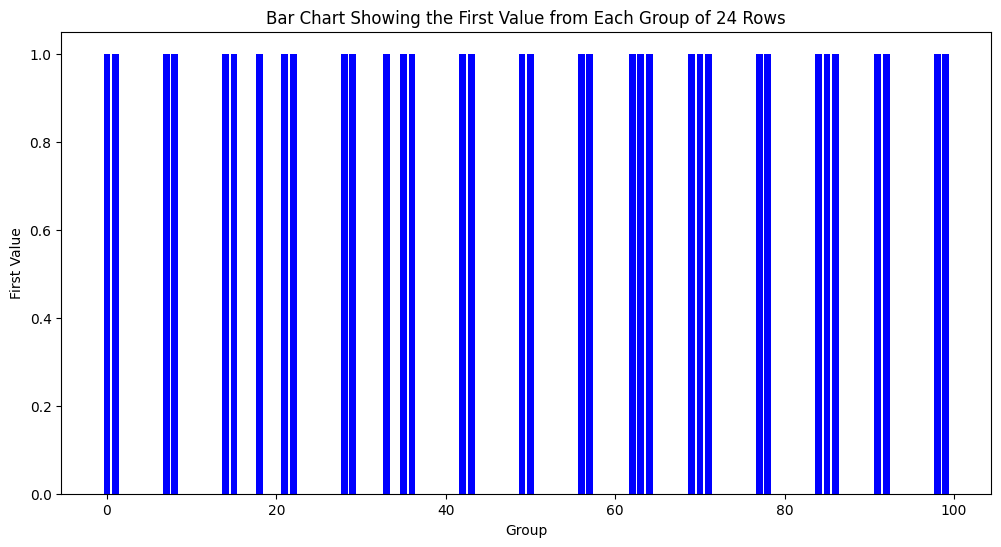

In [ ]:
import matplotlib.pyplot as plt

# Get the last item in the list
last_item = meta_onehot_data[:,-1].reshape(-1,1)
# Reshape the original array into a shape (100, 24)
reshaped_array = last_item.reshape(100, 24)

# Extract the first value from each group of 24 rows to create the new array with shape (100, 1)
new_array = reshaped_array[:, 0]
x = np.arange(100)
# Create the bar chart
# Create a scatter plot
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(100), new_array, color='blue')

# Add a title and labels
plt.title('Bar Chart Showing the First Value from Each Group of 24 Rows')
plt.xlabel('Group')
plt.ylabel('First Value')

# Show the plot
plt.show()

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/EAST-Net')
!pip install shap

In [ ]:
!python /content/drive/MyDrive/EAST-Net/Main.py

Dataset contents: ['poi', 'meta_onehot', 'tcov_relu', 'tcov_half', 'tcov_tanh', 'mask']
channel 0, min: 0.0, max: 38141.0
channel 1, min: 0.0, max: 181954.0
channel 2, min: 0.0, max: 11331.0
channel 3, min: 0.0, max: 121149.0
channel 4, min: 0.0, max: 140401.0
channel 5, min: 0.0, max: 66451.0
channel 6, min: 0.0, max: 90182.0
channel 7, min: 0.0, max: 26707.0
channel 8, min: 0.0, max: 191647.0
channel 9, min: 0.0, max: 48069.0

 Sun May 12 18:39:44 2024
    Loading COVID-US data: (2019, 11, 14)~(2020, 5, 31) on 1.0 hour timeslice, shape: (4800, 51, 10), time_covariate: (4800, 39)

 Sun May 12 18:39:47 2024
EAST-Net model training begins:
Epoch 1: training time: 90.39 s/epoch, training loss: 0.02149; inference time: 3.351 s, validation loss drops from inf to 0.006697. Update model checkpoint..
Epoch 2: training time: 88.53 s/epoch, training loss: 0.01404; inference time: 3.562 s, validation loss drops from 0.006697 to 0.006184. Update model checkpoint..
Epoch 3: training time: 89.02 s/